In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_folder="output_data/"
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lats=[]
lngs=[]
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    #if city=='Dwarka':
    #    print(city.country_code)
    # If the city is unique, then add it to a our cities list
    #print(city.city_name)
    if city.city_name not in cities:
        cities.append(city.city_name)
        lats.append(lat_lng[0])
        lngs.append(lat_lng[1])
        #print(f"City-{city.city_name}  Country code-{city.country_code} Lat-{lat_lng[0]}  Lon-{lat_lng[1]}")

# Print the city count to confirm sufficient count
len(cities)

641

In [3]:
#cities
#

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [5]:
latitude=[]
longitude=[]
maxtemp=[]
humidity=[]
cloudiness =[]
windspeedmph =[]
cityname=[]
country=[]
date=[]
citynum=[]

In [6]:

#print(url)

In [7]:
for city in cities:
    #city=cities[1]
    print(f"Processing City:{city}   URL:{url+'&q='+city}")
    weather_response = requests.get(url+"&q="+city)
    weather_json = weather_response.json()
    #Cheking for HTTP Response code for valid result i.e. weather_json
    if(weather_json['cod']==200):
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        maxtemp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        windspeedmph.append(weather_json['wind']['speed'])
        cloudiness.append(weather_json['clouds']['all'])
        cityname.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        citynum.append(weather_json['id'])
    else:
        print("City not found in openweathermapapi")
    #print(f"City-{cityname} CoOrdinates-{latitude}/{longitude}  Max Temperature-{maxtemp}  Humidity-{humidity} Wind Speed(mph)-{windspeedmph}   Cloudiness-{cloudiness} ")

Processing City:hermanus   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=hermanus
Processing City:khatanga   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=khatanga
Processing City:trincomalee   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=trincomalee
Processing City:capelinha   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=capelinha
Processing City:mataura   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=mataura
Processing City:yellowknife   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=yellowknife
Processing City:talnakh   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31

Processing City:kalmunai   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=kalmunai
Processing City:avarua   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=avarua
Processing City:kloulklubed   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=kloulklubed
Processing City:atuona   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=atuona
Processing City:tual   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=tual
Processing City:stornoway   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=stornoway
City not found in openweathermapapi
Processing City:cidreira   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b

Processing City:dikson   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=dikson
Processing City:cockburn town   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=cockburn town
Processing City:wasilla   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=wasilla
Processing City:samusu   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=samusu
City not found in openweathermapapi
Processing City:bol   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=bol
Processing City:kyle of lochalsh   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=kyle of lochalsh
City not found in openweathermapapi
Processing City:marcona   URL:http://api.openweathermap.org/data

Processing City:nizhneyansk   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=nizhneyansk
City not found in openweathermapapi
Processing City:villa vazquez   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=villa vazquez
City not found in openweathermapapi
Processing City:marsh harbour   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=marsh harbour
Processing City:naze   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=naze
Processing City:killorglin   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=killorglin
Processing City:umkomaas   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=umkomaas
Processing City:saleaula   URL:http://api.openwe

Processing City:daru   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=daru
Processing City:porkhov   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=porkhov
Processing City:batagay-alyta   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=batagay-alyta
Processing City:mogocha   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=mogocha
Processing City:madison   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=madison
Processing City:hobyo   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=hobyo
Processing City:puro   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=puro
Processing City:k

Processing City:mauriti   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=mauriti
Processing City:muragachha   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=muragachha
City not found in openweathermapapi
Processing City:colombo   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=colombo
Processing City:ayagoz   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=ayagoz
Processing City:batemans bay   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=batemans bay
Processing City:bilma   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=bilma
Processing City:champerico   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c9

Processing City:shimoda   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=shimoda
Processing City:skibbereen   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=skibbereen
Processing City:trairi   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=trairi
Processing City:noumea   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=noumea
Processing City:hovd   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=hovd
Processing City:payo   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=payo
Processing City:sirajganj   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=sirajganj
Processing City:ucl

Processing City:hay river   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=hay river
Processing City:kavaratti   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=kavaratti
Processing City:jacqueville   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=jacqueville
Processing City:port alberni   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=port alberni
Processing City:sorland   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=sorland
Processing City:riyadh   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=riyadh
Processing City:privokzalnyy   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc

Processing City:kaspiyskiy   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=kaspiyskiy
Processing City:baruun-urt   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=baruun-urt
Processing City:shieli   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=shieli
Processing City:london   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=london
Processing City:ithaca   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=ithaca
Processing City:mizdah   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=mizdah
Processing City:cartagena del chaira   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=cart

Processing City:paita   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=paita
Processing City:kuala lipis   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=kuala lipis
Processing City:belgrade   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=belgrade
Processing City:erzin   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=erzin
Processing City:zastron   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=zastron
Processing City:bargal   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=bargal
City not found in openweathermapapi
Processing City:orocue   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c

Processing City:dalvik   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=dalvik
Processing City:salamanca   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=salamanca
Processing City:north bend   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=north bend
Processing City:linfen   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=linfen
Processing City:rupert   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=rupert
Processing City:andalan   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=andalan
Processing City:brae   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=brae
Processing City

Processing City:amapa   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=amapa
Processing City:iskenderun   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=iskenderun
Processing City:baghmara   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=baghmara
Processing City:durban   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=durban
Processing City:christchurch   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=christchurch
Processing City:uray   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=uray
Processing City:padang   URL:http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad74c96efa7d6b02954c776ddc2cb31&q=padang
Processin

In [8]:
print(f"  City:{len(cityname)}\n  Cloudiness:{len(cloudiness)}\n  Country:{len(country)}\n  Date:{len(date)}\n  Humidity:{len(humidity)}\n  Lat:{len(latitude)}\n  Lng:{len(longitude)}\n  Max Temp:{len(maxtemp)}\n  Wind Speed:{len(windspeedmph)} ")


  City:582
  Cloudiness:582
  Country:582
  Date:582
  Humidity:582
  Lat:582
  Lng:582
  Max Temp:582
  Wind Speed:582 


In [9]:
city_weather_df=pd.DataFrame({"City":cityname,
                              "City Id":citynum,
                              "Country":country,
                              
                              "Latitude":latitude,
                              "Longitude":longitude,
                              "Date":date,
                              "Temperature":maxtemp,
                              "Humidity":humidity,
                              "Wind Speed (mph)":windspeedmph,
                              "Cloudiness":cloudiness
                             })
city_weather_df.head()


,City,City Id,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed (mph)
0,Hermanus,3366880,0,ZA,1533021250,88,-34.42,19.24,36.06,3.96
1,Khatanga,2022572,20,RU,1533020959,98,71.98,102.47,49.02,8.21
2,Trincomalee,1226260,24,LK,1533021250,56,8.58,81.23,89.97,21.18
3,Capelinha,3467305,0,BR,1533020972,86,-17.69,-42.52,53.88,5.97
4,Mataura,6201424,8,NZ,1533020965,83,-46.19,168.86,48.30,11.68


In [10]:
city_weather_df.to_csv(output_data_folder+output_data_file)

## City Lat/Long plotted on the world map to show the City distribution over the World Map

/Users/vijaysaxena/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/vijaysaxena/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


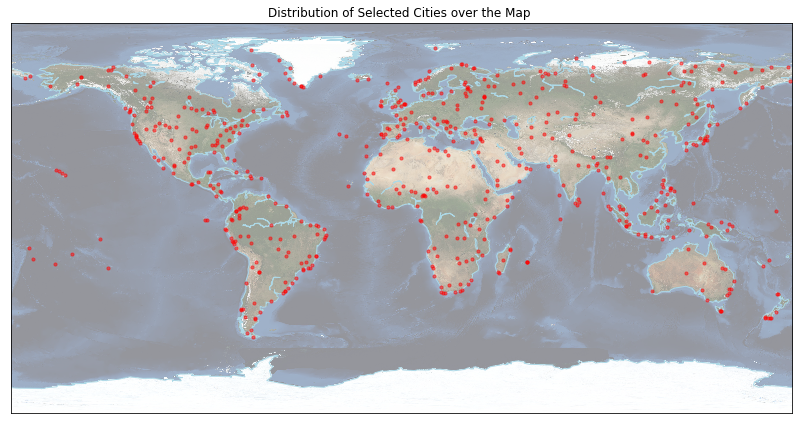

In [11]:
#import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(14, 8))
earth = Basemap()
earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='lightblue', linewidth=1)
plt.scatter( longitude,latitude, s=10, 
            c='red',alpha=0.5, zorder=10)
plt.title("Distribution of Selected Cities over the Map ",fontsize='large')
plt.savefig(output_data_folder+'citydistribution_worldmap.png',bbox_inches='tight')


In [12]:
#Various Display Properties setup 
Size=15 
Alpha=0.8
SizeX=7
SizeY=5
PlotColor='darkblue'
SmallFontSize=8
MinLat=-80
MaxLat=100
GridColor='white'
FaceColor='lightgrey'

## City Latitude vs Max Temperature Plot

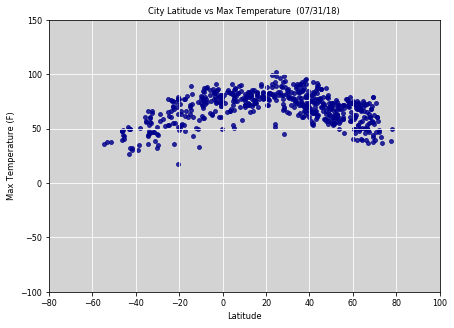

In [13]:
plt.figure(figsize=(SizeX,SizeY))
plt.scatter(latitude, maxtemp,
                s=Size, 
                alpha=Alpha,
                color=PlotColor
               )

plt.xlabel('Latitude',fontsize ='small')
plt.ylabel('Max Temperature (F)',fontsize ='small')
plt.title(f'City Latitude vs Max Temperature  ({time.strftime("%D", time.localtime(date[0]))})',fontsize ='small')

plt.ylim(-100, 150)
plt.xlim(MinLat, MaxLat)
plt.grid(True,color=GridColor)
plt.gca().set_facecolor(FaceColor)
plt.xticks(fontsize=SmallFontSize)
plt.yticks(fontsize=SmallFontSize)

plt.savefig(output_data_folder+'citylatitude_maxtemp.png',bbox_inches='tight')
plt.show()

## City Latitude vs Humidity Plot

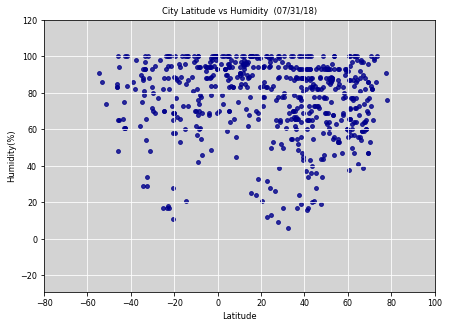

In [14]:
plt.figure(figsize=(SizeX,SizeY))
plt.scatter(latitude, humidity,
                s=Size, 
                alpha=Alpha,
                color=PlotColor
               )
plt.xlabel('Latitude',fontsize ='small')
plt.ylabel('Humidity(%)',fontsize ='small')
plt.title(f'City Latitude vs Humidity  ({time.strftime("%D", time.localtime(date[0]))})',fontsize ='small',fontweight='light')

plt.ylim(-29, 120)
plt.xlim(MinLat, MaxLat)
plt.grid(True,color=GridColor)
plt.gca().set_facecolor(FaceColor)
plt.xticks(fontsize=SmallFontSize)
plt.yticks(fontsize=SmallFontSize)

plt.savefig(output_data_folder+'citylatitude_humidity.png',bbox_inches='tight')

## City Latitude vs Cloudiness Plot

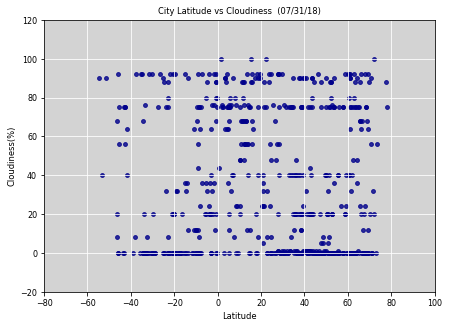

In [15]:
plt.figure(figsize=(SizeX, SizeY))
plt.scatter(latitude, cloudiness,
                s=Size, 
                alpha=Alpha,
                color=PlotColor
               )
plt.xlabel('Latitude',fontsize ='small')
plt.ylabel('Cloudiness(%)',fontsize ='small')
plt.title(f'City Latitude vs Cloudiness  ({time.strftime("%D", time.localtime(date[0]))})',fontsize ='small')

plt.ylim(-20, 120)
plt.xlim(MinLat, MaxLat)
plt.grid(True,color=GridColor)
plt.gca().set_facecolor(FaceColor)
plt.xticks(fontsize=SmallFontSize)
plt.yticks(fontsize=SmallFontSize)

plt.savefig(output_data_folder+'citylatitude_cloudiness.png',bbox_inches='tight')

## City Latitude vs Wind Speed(mph) Plot

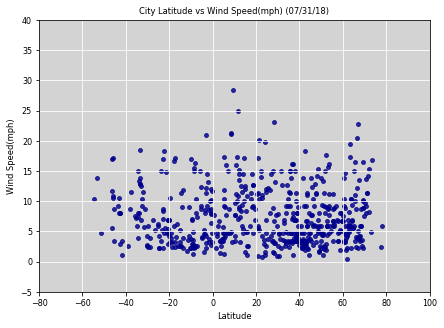

In [16]:
plt.figure(figsize=(SizeX, SizeY))
plt.scatter(latitude, windspeedmph,
                s=Size, 
                alpha=Alpha,
                color=PlotColor
               )
#plt.figure(figsize=(30,20))
plt.title(f'City Latitude vs Wind Speed(mph) ({time.strftime("%D", time.localtime(date[0]))})',fontsize ='small')
plt.ylabel('Wind Speed(mph)',fontsize ='small')
plt.xlabel('Latitude',fontsize ='small')

plt.ylim(-5, 40)
plt.xlim(MinLat, MaxLat)
plt.grid(True,color=GridColor)
plt.gca().set_facecolor(FaceColor)
plt.xticks(fontsize=SmallFontSize)
plt.yticks(fontsize=SmallFontSize)

plt.savefig(output_data_folder+'citylatitude_windspeed.png',bbox_inches='tight')


# Analysis - Three Observable Trends

## 1. Presently Humidity is quit high(City Latitude vs Humidity Plot)
## 2. Presently Clouds are scattered (City Latitude vs Cloudiness Plot)
## 3. Presently mostly winds are under 10mph, only scattered places have windspeed more then 15mpg (City Latitude vs Wind Speed(mph) Plot)